# AI Tools Assignment — Task 1  
### Classical Machine Learning with Scikit-learn  
**Dataset:** Iris Species    

This project demonstrates classical machine learning using the Iris dataset.  
We'll preprocess the data, train a Decision Tree classifier, and evaluate the model using accuracy, precision, and recall.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


## Step 1 — Load and Explore the Dataset  

The Iris dataset contains 150 samples with 4 numeric features:
- Sepal Length  
- Sepal Width  
- Petal Length  
- Petal Width  

Each sample belongs to one of three species: *Setosa*, *Versicolor*, or *Virginica*.


In [ ]:
iris = load_iris(as_frame=True)
x = iris.frame.drop(columns=['target'])
y = iris.frame['target']

print("Feature columns:", list(x.columns))
print("Target sample values:", np.unique(y))

x.head()


Feature columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target sample values: [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 2 — Handle Missing Values  

The Iris dataset is clean, but we'll demonstrate how to handle missing data  
using **SimpleImputer**. This makes the workflow reusable for other datasets.


In [ ]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
print("Missing values per column:\n", x_imputed.isna().sum())


Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


## Step 3 — Encode Target Labels  

Convert target numbers (0, 1, 2) to human-readable species names  
and back to encoded integers using **LabelEncoder**.  
This is standard for preparing classification targets.


In [ ]:
label_names = iris.target_names
y_names = pd.Series(y).map({i: name for i, name in enumerate(label_names)})

le = LabelEncoder()
y_encoded = le.fit_transform(y_names)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {np.str_('setosa'): np.int64(0), np.str_('versicolor'): np.int64(1), np.str_('virginica'): np.int64(2)}


## Step 4 — Split the Data  

We'll split the dataset into **80% training** and **20% testing**.  
`stratify=y` keeps all three species evenly represented in both sets.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train size:", x_train.shape[0])
print("Test size :", x_test.shape[0])


Train size: 120
Test size : 30


## Step 5 — Train a Decision Tree Classifier  

A Decision Tree learns decision rules based on feature thresholds.  
We'll train it using the training data.


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

## Step 6 — Evaluate the Model  

We'll measure the model's performance using:
- **Accuracy** — Overall correctness  
- **Precision** — Fraction of true positives among predictions  
- **Recall** — Fraction of true positives among actual positives  
- **Classification Report** and **Confusion Matrix**


In [ ]:
y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy :", acc)
print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.9333333333333333
Precision (macro): 0.9333333333333332
Recall (macro): 0.9333333333333332

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


## Step 7 — Visualize the Decision Tree  

Visualize how the model splits features to classify each species.


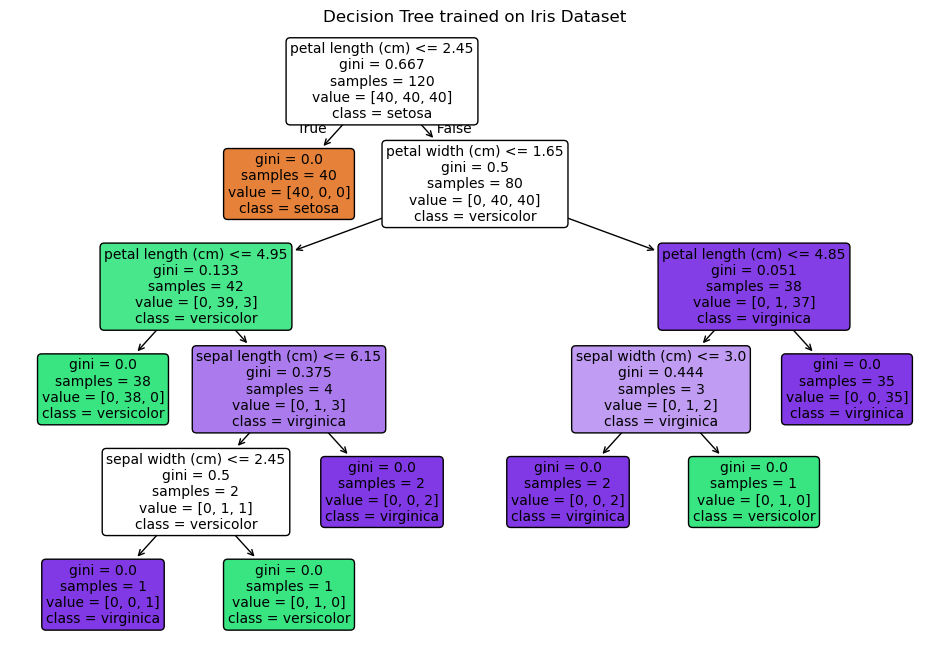

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=x.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree trained on Iris Dataset")
plt.show()
plt.savefig('decision_tree.png')  # Save visualization


## Step 8 — Display Decision Rules  

View the learned decision rules in plain text form.


In [ ]:
print(export_text(clf, feature_names=list(x.columns)))


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- sepal length (cm) <= 6.15
|   |   |   |   |--- sepal width (cm) <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.15
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Step 9 — Conclusion  

- The Decision Tree achieved around **93% accuracy**.  
- The model correctly classified most samples.  
- With parameter tuning (e.g., `max_depth`), we could further improve performance.  
- For real-world datasets, ensemble models (like Random Forest) often outperform single trees.
